# Can you predict which NBA players will make the "All-Star" team?

## Part one: Clean the data

#### Import libraries

In [1]:
import pandas as pd
from pandas import Series
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # For scaling the input data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#### Load 'player_data.csv' 

In [2]:
player_data_df = pd.read_csv('./player_data.csv')
#player_data_df = pd.read_csv('./player_data.csv', index_col = 0) this will automatically remove the first column
# instead of manually dropping the column later

In [3]:
player_data_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,0.368,NaN,...,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,0.435,NaN,...,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,0.394,NaN,...,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,0.312,NaN,...,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,0.308,NaN,...,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,16.7,0.604,8.6,...,0.000,0.572,0.571,0.679,405.0,99.0,62.0,58.0,65.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,13.0,0.508,9.2,...,0.000,0.497,0.494,0.564,124.0,42.0,7.0,21.0,20.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,7.3,0.346,10.8,...,NaN,0.323,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,6.9,0.503,1.9,...,0.333,0.451,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0


#### Drop the first column

In [4]:
player_data_df = player_data_df.drop(['Unnamed: 0'],axis=1)
player_data_df

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,0.368,NaN,NaN,...,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,0.435,NaN,NaN,...,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,0.394,NaN,NaN,...,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,0.312,NaN,NaN,...,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,0.308,NaN,NaN,...,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,16.7,0.604,8.6,17.3,...,0.000,0.572,0.571,0.679,405.0,99.0,62.0,58.0,65.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,13.0,0.508,9.2,17.0,...,0.000,0.497,0.494,0.564,124.0,42.0,7.0,21.0,20.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,7.3,0.346,10.8,24.9,...,NaN,0.323,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,6.9,0.503,1.9,14.2,...,0.333,0.451,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0


#### Remove null values from "Players" column

In [5]:
player_data_df = player_data_df.dropna(subset=['Player'])
player_data_df

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,0.368,NaN,NaN,...,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,0.435,NaN,NaN,...,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,0.394,NaN,NaN,...,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,0.312,NaN,NaN,...,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,0.308,NaN,NaN,...,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,16.7,0.604,8.6,17.3,...,0.000,0.572,0.571,0.679,405.0,99.0,62.0,58.0,65.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,13.0,0.508,9.2,17.0,...,0.000,0.497,0.494,0.564,124.0,42.0,7.0,21.0,20.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,7.3,0.346,10.8,24.9,...,NaN,0.323,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,6.9,0.503,1.9,14.2,...,0.333,0.451,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0


#### Replace null values with 0's in the '3P%' column

In [6]:
player_data_df['3P%']=player_data_df['3P%'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Remove rows for players who started their careers before the 1980 season

In [7]:
players_to_take = player_data_df.groupby('Player')['Year'].agg('min')
players_to_take = players_to_take[players_to_take >= 1980]
players_to_take = players_to_take.reset_index()['Player']
players_to_take

0               A.C. Green
1            A.J. Bramlett
2             A.J. English
3              A.J. Guyton
4             A.J. Hammons
               ...        
2578        Zeljko Rebraca
2579       Zendon Hamilton
2580          Zoran Dragic
2581        Zoran Planinic
2582    Zydrunas Ilgauskas
Name: Player, Length: 2583, dtype: object

In [8]:
players_debut_after_1980 = player_data_df[player_data_df['Player'].isin(players_to_take)]
players_debut_after_1980

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
5733,1980.0,James Bailey,PF,22.0,SEA,67.0,12.3,0.495,10.2,18.3,...,0.000,0.450,0.450,0.673,197.0,28.0,21.0,54.0,79.0,312.0
5741,1980.0,Billy Ray,SG,23.0,POR,16.0,24.1,0.552,6.0,7.6,...,0.421,0.504,0.521,0.718,29.0,31.0,14.0,2.0,20.0,180.0
5748,1980.0,Larry Bird*,PF,23.0,BOS,82.0,20.5,0.538,8.3,23.6,...,0.406,0.481,0.494,0.836,852.0,370.0,143.0,53.0,263.0,1745.0
5753,1980.0,Lawrence Boston,PF,23.0,WSB,13.0,12.6,0.485,15.1,16.2,...,0.000,0.462,0.462,0.615,39.0,2.0,4.0,2.0,8.0,56.0
5759,1980.0,Dudley Bradley,SG,22.0,IND,82.0,13.5,0.502,3.4,8.1,...,0.400,0.452,0.453,0.782,223.0,252.0,211.0,48.0,166.0,688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,16.7,0.604,8.6,17.3,...,0.000,0.572,0.571,0.679,405.0,99.0,62.0,58.0,65.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,13.0,0.508,9.2,17.0,...,0.000,0.497,0.494,0.564,124.0,42.0,7.0,21.0,20.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,7.3,0.346,10.8,24.9,...,0.000,0.323,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,6.9,0.503,1.9,14.2,...,0.333,0.451,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0


#### Load in the 'all_star_appearances.pickle' file and use this data to create a column called 'all_star' that indicates whether or not a player made the All-Star team for a given year
- This file is a dictionary in which the keys are players who've made an All-Star team in their careers
- The values are all the years that the corresponding player made an All-Star team

#### Make sure this column is binary where 1 = Made All-Star team, and 0 = Did not make All-Star team

In [9]:
all_star = pd.read_pickle('./all_star_appearances.pickle')

In [10]:
temp = pd.DataFrame(dict([ (k,Series(list(v))) for k,v in all_star.items() ]))


In [11]:
init_df = pd.DataFrame(columns=['index','variable','value'])

In [12]:
#Creating a new index column to melt the vars over the column values
del_me = temp.reset_index()
#Append all the players and the year in all star data into a single dataframe
for i in temp.columns:
    init_df = init_df.append(pd.melt(del_me, id_vars=['index'],value_vars=[i]))

In [13]:
#Dropping the Nulls
init_df = init_df.dropna()
#Dropping the temporary column created to pivot
init_df = init_df.drop('index',axis=1)

In [14]:
#Renaming the columns
init_df.columns = ['Player','Year']
init_df['all_star'] = 1

In [15]:
#Join the dataframes players_debut_after_1980 and init_df
joined_df = players_debut_after_1980.merge(init_df, on=['Player','Year'], how= 'left')
joined_df['all_star']=joined_df['all_star'].fillna(0)
## From the above join we can clearly see that the pickle file has information about all star players 
## who are missing in out players_data.csv file

## Part 2: Exploratory data analysis

#### Generate descriptive stats for the features

In [16]:
joined_df.describe()

,Year,Age,G,PER,TS%,ORB%,DRB%,TRB%,AST%,STL%,...,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,all_star
count,17408.000000,17408.000000,17408.000000,17403.000000,17332.000000,17403.000000,17403.000000,17403.000000,17403.000000,17403.000000,...,17292.000000,17320.000000,16684.000000,17408.000000,17408.000000,17408.000000,17408.000000,17408.000000,17408.000000,17408.000000
mean,2001.659926,26.641716,48.921473,12.329667,0.502936,6.147561,13.821732,9.985600,13.016181,1.654301,...,0.456072,0.463653,0.719077,199.330710,106.821691,37.808709,23.547507,69.885627,470.834501,0.031882
std,9.866835,3.969742,26.677348,6.306843,0.096376,5.048217,6.629142,5.093101,9.669535,1.040907,...,0.102074,0.100365,0.148665,199.955646,135.937581,37.366733,35.807557,65.117120,470.668694,0.175691
min,1980.000000,18.000000,1.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,24.000000,25.000000,9.600000,0.472000,2.500000,9.000000,6.000000,6.200000,1.100000,...,0.421000,0.432000,0.654000,44.000000,15.000000,8.000000,3.000000,17.000000,88.000000,0.000000
50%,2002.000000,26.000000,53.000000,12.600000,0.516000,5.200000,12.800000,9.200000,10.200000,1.500000,...,0.466000,0.475000,0.746000,140.000000,58.000000,27.000000,11.000000,52.000000,323.000000,0.000000
75%,2010.000000,29.000000,75.000000,15.500000,0.551000,9.000000,18.100000,13.400000,17.800000,2.100000,...,0.502000,0.511000,0.812000,288.000000,144.000000,57.000000,29.000000,106.000000,726.000000,0.000000
max,2017.000000,44.000000,85.000000,129.100000,1.136000,100.000000,100.000000,100.000000,100.000000,24.200000,...,1.000000,1.500000,1.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,3041.000000,1.000000


In [17]:
## TODO: - Separate box plot for each feature

<AxesSubplot:>

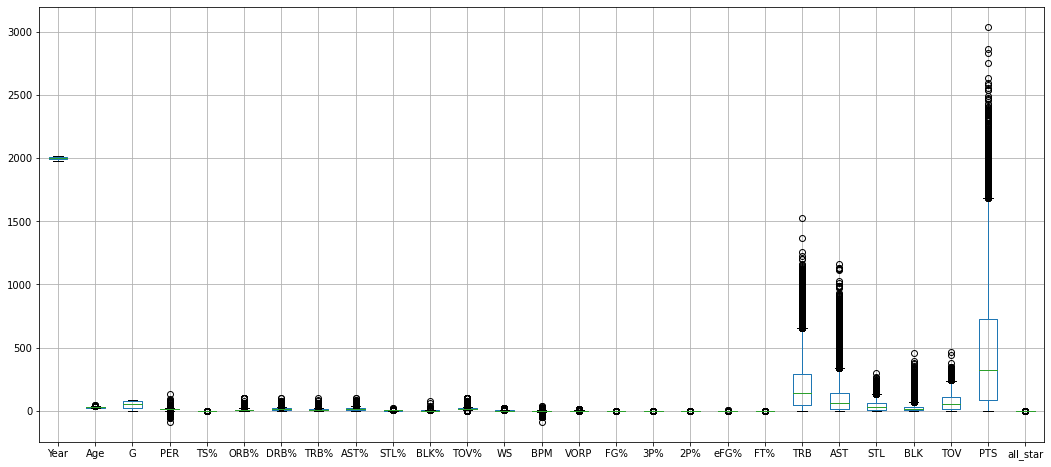

In [18]:
plt.figure(figsize=(18,8))
joined_df.boxplot()

In [19]:
for i in joined_df['Year'].unique():
    print(joined_df[joined_df['Year']==i].describe())

         Year        Age          G        PER        TS%       ORB%  \
count    59.0  59.000000  59.000000  59.000000  59.000000  59.000000   
mean   1980.0  22.898305  48.813559  11.322034   0.485475   7.450847   
std       0.0   1.561331  27.902833   5.180603   0.074046   3.940216   
min    1980.0  19.000000   1.000000   0.200000   0.284000   0.000000   
25%    1980.0  22.000000  23.500000   8.250000   0.445000   5.100000   
50%    1980.0  23.000000  52.000000  10.700000   0.498000   6.900000   
75%    1980.0  23.000000  77.000000  14.750000   0.538500  10.200000   
max    1980.0  28.000000  82.000000  24.100000   0.615000  20.300000   

            DRB%      TRB%       AST%       STL%  ...        2P%       eFG%  \
count  59.000000  59.00000  59.000000  59.000000  ...  58.000000  58.000000   
mean   13.310169  10.40339  11.666102   1.764407  ...   0.444586   0.444517   
std     7.903441   5.64642   6.634305   1.208841  ...   0.077366   0.068907   
min     0.000000   0.00000   0.0000

         Year         Age           G         PER         TS%        ORB%  \
count   296.0  296.000000  296.000000  296.000000  296.000000  296.000000   
mean   1986.0   25.189189   52.327703   11.414189    0.498341    6.944932   
std       0.0    2.168656   28.663519    7.594342    0.108843    6.918796   
min    1986.0   20.000000    1.000000  -32.200000    0.000000    0.000000   
25%    1986.0   23.000000   27.750000    8.775000    0.476500    3.400000   
50%    1986.0   25.000000   64.000000   12.400000    0.516000    6.600000   
75%    1986.0   27.000000   79.000000   15.200000    0.551250    9.100000   
max    1986.0   30.000000   83.000000   37.700000    1.136000  100.000000   

             DRB%        TRB%        AST%        STL%  ...         2P%  \
count  296.000000  296.000000  296.000000  296.000000  ...  295.000000   
mean    12.977365    9.983446   12.782432    1.726689  ...    0.457024   
std      6.938651    5.484125    9.601898    1.628079  ...    0.097727   
min      0

         Year         Age           G         PER         TS%        ORB%  \
count   446.0  446.000000  446.000000  446.000000  441.000000  446.000000   
mean   1992.0   26.562780   51.778027   12.342601    0.503063    6.843946   
std       0.0    3.339159   28.023065    5.477708    0.086207    6.944687   
min    1992.0   21.000000    1.000000  -13.600000    0.056000    0.000000   
25%    1992.0   24.000000   27.000000   10.100000    0.475000    3.100000   
50%    1992.0   26.000000   60.000000   12.700000    0.507000    5.700000   
75%    1992.0   29.000000   78.750000   15.000000    0.549000    9.000000   
max    1992.0   36.000000   84.000000   32.400000    0.970000  100.000000   

             DRB%        TRB%        AST%        STL%  ...         2P%  \
count  446.000000  446.000000  446.000000  446.000000  ...  441.000000   
mean    12.781390    9.821525   13.527354    1.715022  ...    0.461785   
std      6.915252    5.595980    9.333175    0.986731  ...    0.098977   
min      0

         Year         Age           G         PER         TS%        ORB%  \
count   567.0  567.000000  567.000000  567.000000  564.000000  567.000000   
mean   1997.0   27.335097   46.416226   12.084303    0.501234    6.427160   
std       0.0    3.928318   27.671271    5.911510    0.099610    4.607097   
min    1997.0   18.000000    1.000000  -19.900000    0.000000    0.000000   
25%    1997.0   24.000000   20.500000    9.400000    0.470750    2.800000   
50%    1997.0   27.000000   49.000000   12.500000    0.520000    5.500000   
75%    1997.0   30.000000   73.500000   15.200000    0.548000    9.700000   
max    1997.0   39.000000   83.000000   37.700000    1.000000   33.300000   

             DRB%        TRB%        AST%        STL%  ...         2P%  \
count  567.000000  567.000000  567.000000  567.000000  ...  564.000000   
mean    13.563845    9.987831   13.099118    1.823810  ...    0.447044   
std      7.064777    5.251634    9.897397    1.433699  ...    0.108453   
min      0

         Year         Age           G         PER         TS%       ORB%  \
count   500.0  500.000000  500.000000  500.000000  497.000000  500.00000   
mean   2002.0   27.240000   50.964000   12.677000    0.492022    5.97400   
std       0.0    4.658089   26.071405    5.095891    0.086256    4.20074   
min    2002.0   19.000000    1.000000  -11.200000    0.000000    0.00000   
25%    2002.0   23.000000   28.000000   10.000000    0.468000    2.50000   
50%    2002.0   26.000000   58.000000   13.100000    0.501000    5.10000   
75%    2002.0   31.000000   75.000000   15.600000    0.538000    9.10000   
max    2002.0   39.000000   83.000000   31.300000    1.025000   28.90000   

             DRB%        TRB%        AST%        STL%  ...         2P%  \
count  500.000000  500.000000  500.000000  500.000000  ...  496.000000   
mean    13.827400    9.897600   13.793400    1.661200  ...    0.443256   
std      6.096544    4.475284   10.046438    0.903774  ...    0.086689   
min      0.000000  

         Year         Age           G         PER         TS%        ORB%  \
count   560.0  560.000000  560.000000  558.000000  556.000000  558.000000   
mean   2006.0   26.671429   48.567857   12.018817    0.505023    5.837814   
std       0.0    4.243388   25.967829    6.330762    0.094338    4.397121   
min    2006.0   18.000000    1.000000  -54.400000    0.000000    0.000000   
25%    2006.0   23.000000   26.000000    9.200000    0.474000    2.400000   
50%    2006.0   26.000000   52.000000   12.200000    0.518000    4.450000   
75%    2006.0   30.000000   73.000000   15.200000    0.551250    8.900000   
max    2006.0   39.000000   82.000000   33.700000    1.000000   29.800000   

             DRB%        TRB%        AST%        STL%  ...         2P%  \
count  558.000000  558.000000  558.000000  558.000000  ...  555.000000   
mean    14.393728   10.121326   11.954122    1.561111  ...    0.453834   
std      6.154260    4.597653    8.852170    1.216291  ...    0.105978   
min      0

         Year         Age           G         PER         TS%        ORB%  \
count   577.0  577.000000  577.000000  576.000000  574.000000  576.000000   
mean   2010.0   26.759099   47.956672   12.446007    0.512622    5.773958   
std       0.0    4.025853   26.780548    5.871803    0.093632    4.467784   
min    2010.0   19.000000    1.000000  -38.100000    0.000000    0.000000   
25%    2010.0   24.000000   25.000000    9.700000    0.480250    2.100000   
50%    2010.0   26.000000   52.000000   12.700000    0.526000    4.500000   
75%    2010.0   30.000000   74.000000   15.725000    0.560000    8.925000   
max    2010.0   39.000000   82.000000   33.300000    1.064000   29.000000   

             DRB%        TRB%        AST%        STL%  ...         2P%  \
count  576.000000  576.000000  576.000000  576.000000  ...  572.000000   
mean    14.369097   10.065278   12.219618    1.555382  ...    0.469439   
std      6.195857    4.777768    9.370832    0.982157  ...    0.089535   
min      0

         Year         Age           G         PER         TS%        ORB%  \
count   608.0  608.000000  608.000000  608.000000  601.000000  608.000000   
mean   2014.0   26.460526   46.789474   12.209211    0.506607    5.383553   
std       0.0    4.048115   26.792050    7.775330    0.098955    6.867539   
min    2014.0   19.000000    1.000000  -40.600000    0.000000    0.000000   
25%    2014.0   23.000000   23.000000    9.100000    0.480000    1.900000   
50%    2014.0   26.000000   51.500000   12.500000    0.521000    3.600000   
75%    2014.0   29.000000   72.250000   15.600000    0.556000    7.850000   
max    2014.0   39.000000   83.000000  129.100000    1.000000  100.000000   

             DRB%        TRB%        AST%        STL%  ...         2P%  \
count  608.000000  608.000000  608.000000  608.000000  ...  599.000000   
mean    14.533059    9.990296   12.387993    1.589638  ...    0.461791   
std      6.906925    5.778688    9.295742    1.160884  ...    0.111069   
min      0

In [20]:
# No of players in all_star team in each year as per our database
joined_df.groupby('Year').sum()['all_star']

Year
1980.0     1.0
1981.0     0.0
1982.0     3.0
1983.0     5.0
1984.0     7.0
1985.0     7.0
1986.0     5.0
1987.0     7.0
1988.0     9.0
1989.0     9.0
1990.0     5.0
1991.0    11.0
1992.0     9.0
1993.0    10.0
1994.0    15.0
1995.0    10.0
1996.0     9.0
1997.0    17.0
1998.0    15.0
1999.0     0.0
2000.0    15.0
2001.0    21.0
2002.0    19.0
2003.0    20.0
2004.0    20.0
2005.0    23.0
2006.0    22.0
2007.0    26.0
2008.0    26.0
2009.0    25.0
2010.0    27.0
2011.0    28.0
2012.0    25.0
2013.0    25.0
2014.0    25.0
2015.0    28.0
2016.0    26.0
2017.0     0.0
Name: all_star, dtype: float64

In [21]:
joined_df['Pos'].value_counts()

PF       3702
PG       3487
C        3394
SG       3392
SF       3238
PG-SG      28
C-PF       26
SF-SG      25
SG-SF      25
SG-PG      23
PF-C       23
PF-SF      22
SF-PF      20
SG-PF       2
PG-SF       1
Name: Pos, dtype: int64

In [22]:
joined_df['Player'].value_counts()

Gerald Henderson    29
Nazr Mohammed       28
Kevin Willis        27
Joe Smith           26
Juwan Howard        25
                    ..
Nemanja Nedovic      1
Charles Claxton      1
Igor Rakocevic       1
Voise Winters        1
Peter Aluma          1
Name: Player, Length: 2583, dtype: int64

In [23]:
joined_df['Tm'].value_counts()

TOT    1524
GSW     594
PHI     586
DAL     584
SAS     581
CLE     576
ATL     569
NYK     567
MIL     565
DEN     563
HOU     562
PHO     559
LAC     552
CHI     551
DET     550
BOS     548
POR     540
IND     530
UTA     523
SAC     515
LAL     514
NJN     514
MIA     486
ORL     465
MIN     453
TOR     399
SEA     382
WAS     351
MEM     287
WSB     236
CHH     232
CHA     183
OKC     163
NOH     161
VAN      98
BRK      93
NOP      89
CHO      53
KCK      41
SDC      35
NOK      34
Name: Tm, dtype: int64

In [24]:
joined_df[['Player','Pos','Tm']].value_counts()

Player            Pos  Tm 
Kobe Bryant       SG   LAL    19
John Stockton*    PG   UTA    19
Reggie Miller*    SG   IND    18
Karl Malone*      PF   UTA    18
Hakeem Olajuwon*  C    HOU    17
                              ..
Larry Micheaux    PF   TOT     1
Larry Nance       PF   TOT     1
Larry Owens       SF   NJN     1
                       SAS     1
John Salmons      SF   NOP     1
Length: 9662, dtype: int64

#### Create a corr map of the features

In [25]:
corr = joined_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Age,G,PER,TS%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,WS,BPM,VORP,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS,all_star
Year,1.000000,0.096741,-0.067919,0.024127,0.031162,-0.115990,0.089989,0.001410,-0.017746,-0.063154,0.068335,-0.119876,-0.018086,0.040398,-0.010252,-0.062888,0.194919,0.012252,0.062309,0.024800,-0.046927,-0.067223,-0.096684,-0.049064,-0.124137,-0.055641,0.040985
Age,0.096741,1.000000,0.004769,-0.009865,0.026354,-0.079558,0.025991,-0.020508,0.036545,-0.046877,-0.041219,-0.018242,0.066016,0.080678,0.051517,-0.019981,0.067555,-0.019472,0.024951,0.093756,0.010556,0.032877,-0.006446,-0.027650,-0.039994,-0.012182,0.008142
G,-0.067919,0.004769,1.000000,0.402365,0.364948,-0.044950,0.053298,0.011658,0.143443,0.026679,0.022499,-0.159878,0.651598,0.538573,0.434735,0.315746,0.225244,0.295143,0.335750,0.202688,0.703795,0.573491,0.717599,0.470279,0.747870,0.735061,0.163577
PER,0.024127,-0.009865,0.402365,1.000000,0.719290,0.180523,0.201738,0.228476,0.266801,0.190448,0.119949,-0.341734,0.573970,0.797704,0.506779,0.645218,0.195886,0.594715,0.655099,0.293669,0.465301,0.401567,0.454330,0.332481,0.492948,0.553934,0.251596
TS%,0.031162,0.026354,0.364948,0.719290,1.000000,0.015387,0.102857,0.077859,0.056180,-0.005679,0.034360,-0.091959,0.402339,0.639375,0.308334,0.883423,0.213824,0.829980,0.936531,0.331841,0.317866,0.224776,0.280551,0.216932,0.313280,0.352507,0.108163
ORB%,-0.115990,-0.079558,-0.044950,0.180523,0.015387,1.000000,0.471903,0.811798,-0.425773,-0.120586,0.330070,0.019715,0.008708,0.031077,0.013273,0.205918,-0.397464,0.111426,0.037407,-0.351621,0.228892,-0.261120,-0.146087,0.240174,-0.083913,-0.087492,-0.018871
DRB%,0.089989,0.025991,0.053298,0.201738,0.102857,0.471903,1.000000,0.892431,-0.378234,-0.185822,0.410199,0.018093,0.149299,0.094035,0.141243,0.228589,-0.290133,0.158155,0.113584,-0.238060,0.430150,-0.178142,-0.060058,0.386605,0.038692,0.046701,0.071174
TRB%,0.001410,-0.020508,0.011658,0.228476,0.077859,0.811798,0.892431,1.000000,-0.458428,-0.182458,0.430149,0.021449,0.105207,0.076874,0.102842,0.253475,-0.386372,0.160923,0.095690,-0.319842,0.393422,-0.244786,-0.112047,0.371831,-0.016324,-0.012475,0.039232
AST%,-0.017746,0.036545,0.143443,0.266801,0.056180,-0.425773,-0.378234,-0.458428,1.000000,0.288576,-0.324427,0.131751,0.230145,0.258871,0.265845,-0.056206,0.315660,-0.006119,0.022305,0.263022,-0.038007,0.670559,0.397769,-0.156610,0.391115,0.268011,0.157661
STL%,-0.063154,-0.046877,0.026679,0.190448,-0.005679,-0.120586,-0.185822,-0.182458,0.288576,1.000000,-0.147113,0.069280,0.067341,0.290172,0.152954,-0.047432,0.111375,-0.018637,-0.027517,0.067854,-0.051708,0.195023,0.307136,-0.088398,0.096666,0.049868,0.026034


#### Graph the distibution of the 'Age' feature

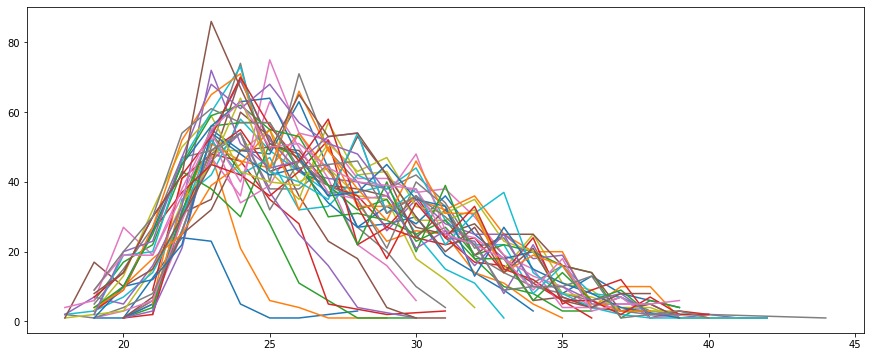

In [26]:
plt.figure(figsize=(15,6))
for i in joined_df['Year'].unique():
    plotter = joined_df[joined_df['Year']==i].groupby('Age').count()["Player"]
    plt.plot(plotter.index,plotter)

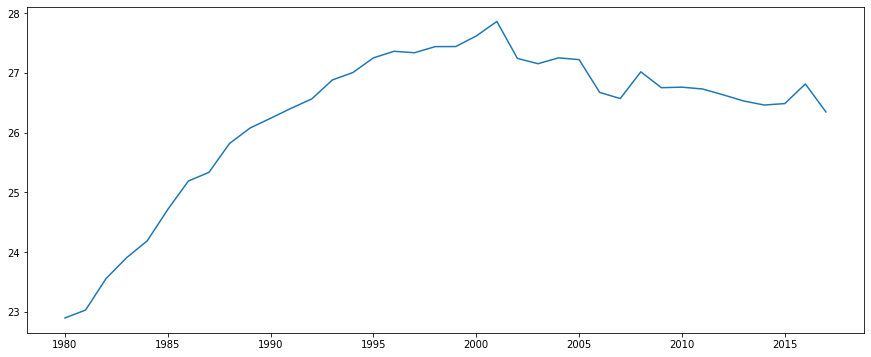

In [27]:
plt.figure(figsize=(15,6))
plotter_1 = joined_df.groupby('Year').mean()[['Age']].rename(columns={"Age": "average_age"})
plt.plot(plotter_1.index,plotter_1['average_age'])

#### On average we can see that the average age of an NBA player is increasing over the past 3 decades

## Part 3: Classification

### Build a classifier that predicts whether or not a player makes an All-Star team based on their stats for that season

In [28]:
pos_list = list(joined_df['Pos'].unique())
teams_list = list(joined_df['Tm'].unique())

cat_dtype_team = pd.api.types.CategoricalDtype(categories=teams_list)
cat_dtype_pos = pd.api.types.CategoricalDtype(categories=pos_list)

In [29]:
# convert categorical data into dummies, drop the player and year columns,scale the data and return the dataframe
def convert_categorical(my_df):
    scale = MinMaxScaler()
    my_df['Tm']=my_df['Tm'].astype(cat_dtype_team)
    my_df['Pos']=my_df['Pos'].astype(cat_dtype_pos)
    my_df = pd.get_dummies(my_df,columns=['Tm','Pos'])
    my_df = my_df.drop(['Year','Player'],axis=1)
    my_df = my_df.fillna(0)
    col_list = list(my_df.columns)
    my_df = pd.DataFrame(scale.fit_transform(my_df),columns=col_list)
    return my_df

copy_df = joined_df.copy()
copy_df = convert_categorical(copy_df)


# Make sure the dataset is balanced

### Setting up the classifier

In [30]:
#reference/pointer to RandomForest classifier
clf = RandomForestClassifier(random_state=2020,
                            max_depth=17,
                            n_estimators=1000,
                            class_weight = 'balanced')

### Perform cross validation to evaluate the model's performance with f1_weighted score

In [31]:
X = copy_df.drop('all_star',axis=1)
y = copy_df['all_star']

scores = cross_val_score(clf, X, y, cv=5,scoring='f1_weighted')

In [32]:
scores

array([0.95422273, 0.96216899, 0.96919006, 0.9687718 , 0.97074522])

### Since the performance has been pretty decent, fitting the model using all the data, users can predict using the steps mentioned below

In [33]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)

#### To make predictions on any new data, perform the following: -
#### a) call convert_categorical on the dataframe to be input
#### b) clf.predict on the dataframe which needs to be used for predictions